Trabalho da Disciplina Reconhecimento de padrões (2024/2)

Professor: Dr. Francisco de Assis Boldt

Aluno(a): Suziane Lopes Ramalho Rufino Mattos

# **Competição do Kaggle - Digit Recognizer**
Link: https://www.kaggle.com/competitions/digit-recognizer/data


**Problema**: O objetivo é construir um modelo de aprendizado de máquina capaz de reconhecer dígitos manuscritos (de 0 a 9) a partir de imagens no formato 28x28 pixels, usando o conjunto de dados fornecido.

Instalando dependências


In [ ]:
!pip install numpy pandas matplotlib scikit-learn


# Banco de dados - MNIST

**Dimensões:** 28 pixels de altura e 28 pixels de largura, formando uma matriz 2D com dimensões 28x28 = 784 pixels por imagem.

**Representação:** Cada pixel é representado por um número inteiro entre 0 e 255

* 0: Representa o preto absoluto (pixel totalmente escuro).

* 255: Representa o branco absoluto (pixel totalmente claro).

* Valores intermediários (ex.: 127) representam diferentes tons de cinza.

# Visualizando exemplos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Primeiros exemplos - nível de pixel
print(train_data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

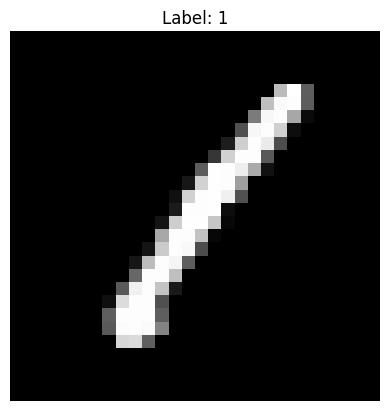

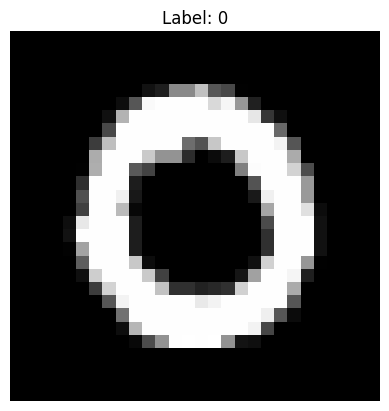

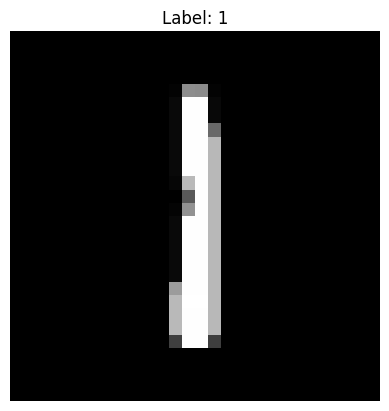

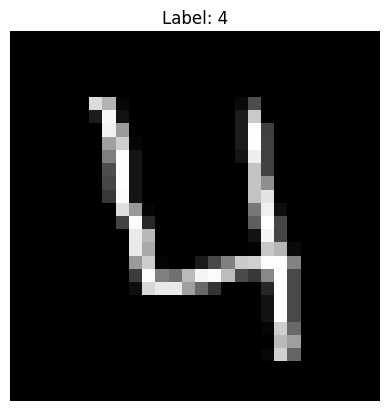

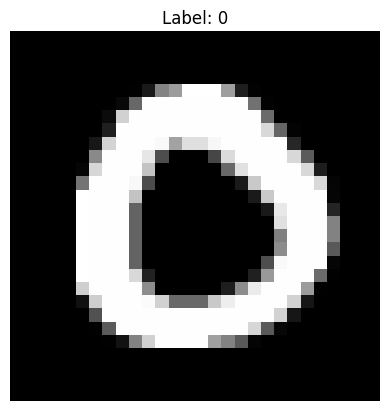

In [ ]:
for i in range(5): # Visualização de 5 exemplos - nível de imagem
    img = train_data.iloc[i, 1:].values.reshape(28, 28)  # Transformação em 28x28
    label = train_data.iloc[i, 0] # Extração do rótulo
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


# Verificação de dados ausentes

In [ ]:
missing_values = train_data.isnull().sum()
print(missing_values)

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


# Divisão dos dados

In [ ]:
from sklearn.model_selection import train_test_split

# Usando a divisão já fornecida pelo kaggle para treinamento (42.000)
X_train_total = train_data.iloc[:, 1:] # Todas as colunas, exceto a primeira (rótulo)
y_train_total = train_data.iloc[:, 0]  # Apenas a primeira coluna (rótulo)

# Dividir o conjunto de treino em treino e validação (80% treino, 20% validação)
X_train, X_val, y_train, y_val = train_test_split(X_train_total, y_train_total, test_size=0.2, random_state=42)

# Usando a divisão já fornecida pelo kaggle para teste (28.000)
X_test = test_data

# Exibir informações sobre os tamanhos dos conjuntos
print(f"Conjunto de treino: {X_train.shape[0]} exemplos")
print(f"Conjunto de validação: {X_val.shape[0]} exemplos")
print(f"Conjunto de teste: {X_test.shape[0]} exemplos")


Conjunto de treino: 33600 exemplos
Conjunto de validação: 8400 exemplos
Conjunto de teste: 28000 exemplos


# Distribuição dos Rótulos (Labels)

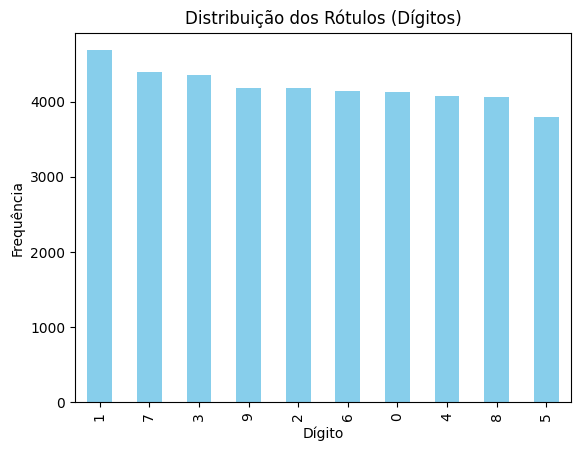

In [ ]:
# Contagem de cada rótulo (dígito)
label_counts = train_data.iloc[:, 0].value_counts()

# Gráfico de barras
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos Rótulos (Dígitos)')
plt.xlabel('Dígito')
plt.ylabel('Frequência')
plt.show()



# Implementação Perceptron Multicamadas (MLP)

O MLPClassifier é uma implementação de rede neural com múltiplas camadas ocultas, usada para classificação. Ele utiliza o algoritmo de retropropagação para ajustar os pesos da rede e minimizar a função de perda durante o treinamento.

Link: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Configuração utilizada:

* hidden_layer_sizes=(128, 64): Configura duas camadas ocultas com 128 e 64 neurônios, respectivamente.
* max_iter=300: Limita o treinamento a 300 iterações do otimizador.
* activation='relu': Usa a função ReLU para ativação, que introduz não-linearidade.
* solver='adam': Utiliza o otimizador Adam para ajustar os pesos da rede.
* random_state=42: Garante reprodutibilidade configurando uma semente aleatória fixa.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=42)

# Realizar validação cruzada com 5 divisões
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média (validação cruzada): {scores.mean() * 100:.2f}%")

Acurácia média (validação cruzada): 95.18%


In [ ]:
# Treinar o modelo final com todo o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred = model.predict(X_val)

# Calcular as métricas
accuracy_mlp = accuracy_score(y_val, y_pred)
precision_mlp = precision_score(y_val, y_pred, average='weighted')
recall_mlp = recall_score(y_val, y_pred, average='weighted')
f1_mlp = f1_score(y_val, y_pred, average='weighted')

# Métricas
print(f"Acurácia: {accuracy_mlp * 100:.2f}%")
print(f"Precisão: {precision_mlp * 100:.2f}%")
print(f"Recall: {recall_mlp * 100:.2f}%")
print(f"F1-Score: {f1_mlp * 100:.2f}%")

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Criar DataFrame para submissão
submission = pd.DataFrame({"ImageId": range(1, len(predictions) + 1), "Label": predictions})
submission.to_csv("submission_mlp.csv", index=False)

print("Arquivo criado")

Acurácia: 95.13%
Precisão: 95.15%
Recall: 95.13%
F1-Score: 95.13%
Arquivo criado


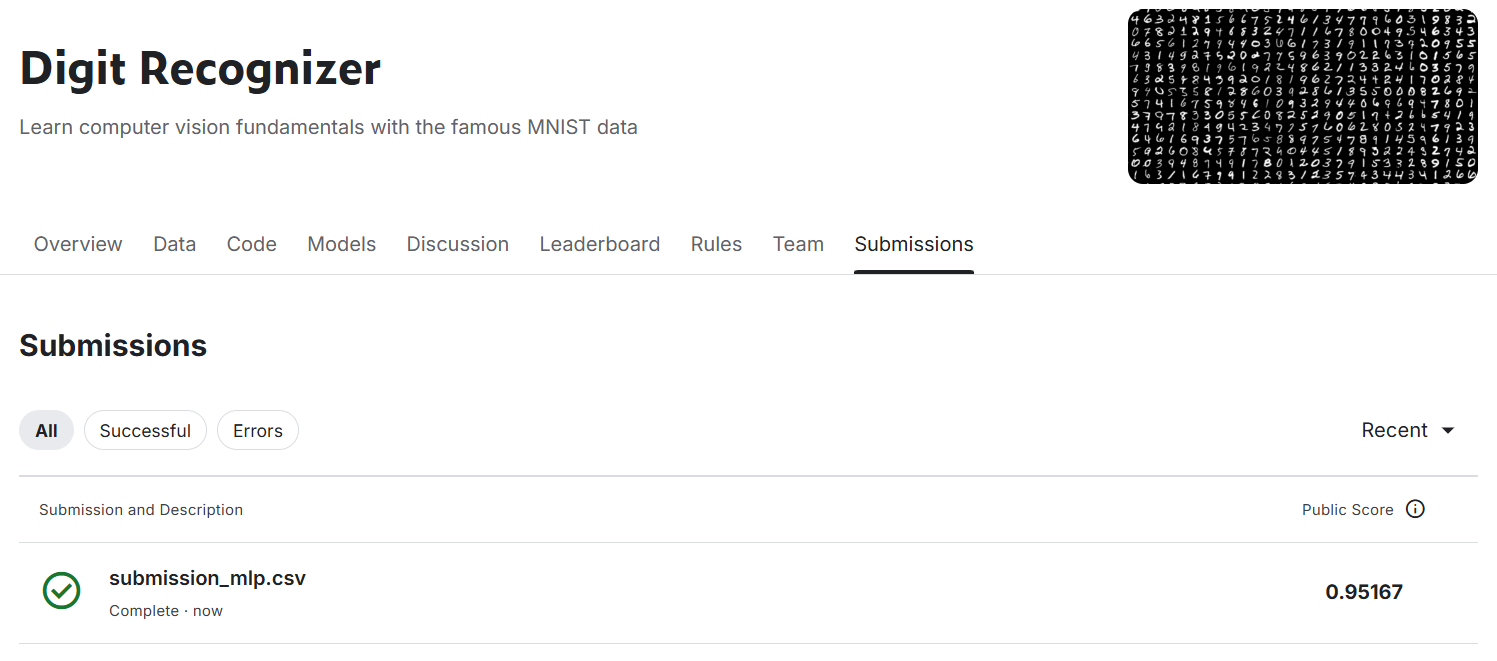

# Seleção de features

A seleção de features é o processo de identificar e selecionar as possíveis features mais relevantes para um modelo de aprendizado de máquina, com o objetivo de melhorar a precisão, reduzir o overfitting e diminuir o custo computacional.

O SelectKBest é uma técnica de seleção de features que escolhe as K melhores features com base em um critério estatístico. Permite selecionar as features mais importantes para melhorar o desempenho do modelo.

Link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Seleção das K melhores features
selector = SelectKBest(chi2, k=50)  # 50 melhores features
X_new = selector.fit_transform(X_train, y_train)

# features selecionadas
selected_features = selector.get_support(indices=True)
print(f"Features selecionadas: {selected_features}")

Features selecionadas: [ 99 100 101 329 330 350 357 358 359 372 378 385 386 387 399 400 413 414
 415 426 427 428 441 442 454 455 456 469 482 483 484 510 511 512 513 514
 515 538 539 540 541 542 543 566 567 568 569 595 596 597]


In [ ]:
# Criar o modelo
model_features = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=42)

# Realizar validação cruzada com as características selecionadas
scores = cross_val_score(model_features, X_new, y_train, cv=5, scoring='accuracy')

# Exibir a acurácia média
print(f"Acurácia média (validação cruzada): {scores.mean() * 100:.2f}%")

# Treinar o modelo final com as características selecionadas
model_features.fit(X_new, y_train)

# Fazer previsões no conjunto de validação
X_val_new = selector.transform(X_val)
y_pred_features = model_features.predict(X_val_new)

# Calcular as métricas
accuracy_features = accuracy_score(y_val, y_pred_features)
precision_features = precision_score(y_val, y_pred_features, average='weighted')
recall_features = recall_score(y_val, y_pred_features, average='weighted')
f1_features = f1_score(y_val, y_pred_features, average='weighted')

# Métricas
print(f"Acurácia: {accuracy_features * 100:.2f}%")
print(f"Precisão: {precision_features * 100:.2f}%")
print(f"Recall: {recall_features * 100:.2f}%")
print(f"F1-Score: {f1_features * 100:.2f}%")

# Transformar o conjunto de teste
X_test_new = selector.transform(X_test)

# Fazer previsões no conjunto de teste
predictions_features = model_features.predict(X_test_new)

# Criar DataFrame para submissão
submission = pd.DataFrame({"ImageId": range(1, len(predictions_features) + 1), "Label": predictions_features})
submission.to_csv("submission_mlp_features.csv", index=False)

print("Arquivo criado")


Acurácia média (validação cruzada): 69.31%
Acurácia: 71.57%
Precisão: 71.40%
Recall: 71.57%
F1-Score: 71.25%
Arquivo criado


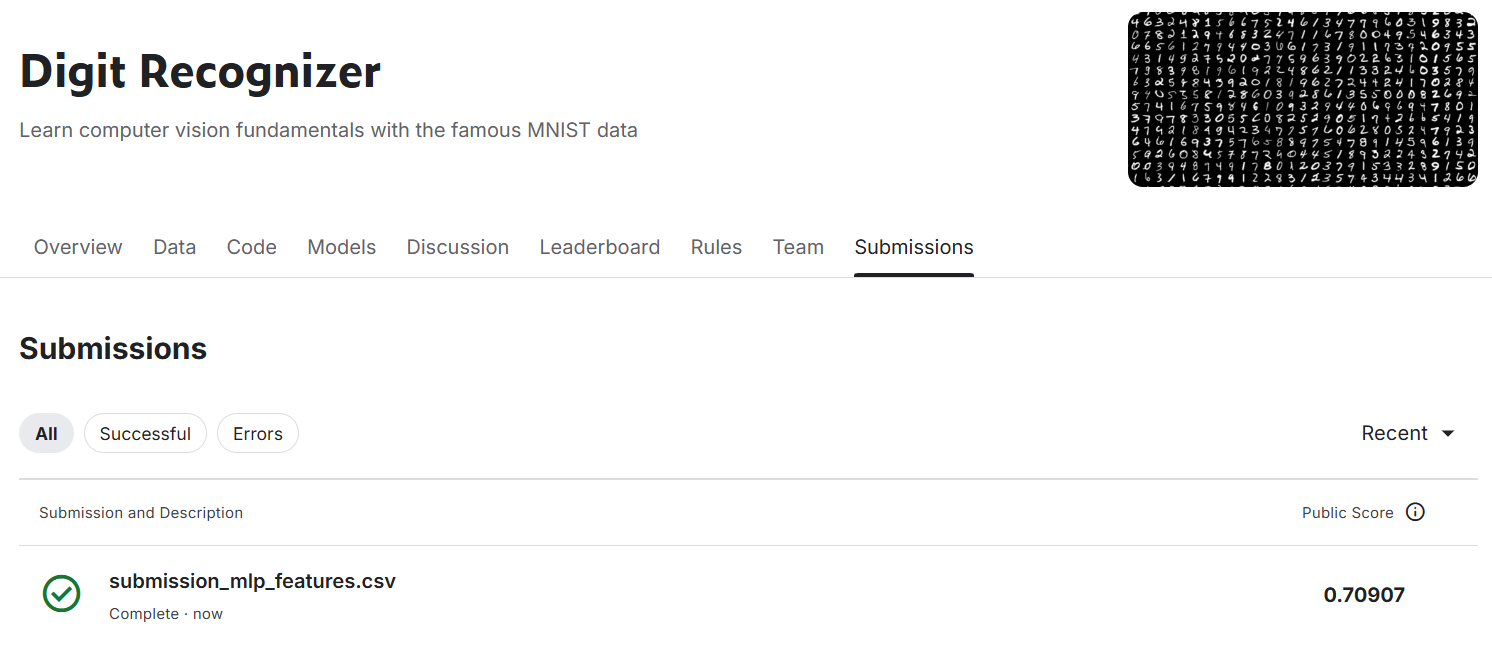

# Random Forest

O RandomForestClassifier é um modelo de aprendizado de máquina baseado em uma floresta aleatória de árvores de decisão. Ele constrói várias árvores de decisão durante o treinamento e usa a média para melhorar a precisão.

Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Configuração utilizada:
* n_estimators=100: Número de árvores na floresta, controlando a robustez e estabilidade do modelo.
* max_depth=None: Permite que as árvores cresçam completamente sem limitar a profundidade.
* random_state=42: Garante reprodutibilidade configurando uma semente aleatória fixa.
* n_jobs=-1: Usa todos os núcleos do processador para paralelizar e acelerar o treinamento.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo Random Forest
model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Validação cruzada
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

# Exibir a acurácia média
print(f"Acurácia média (validação cruzada): {scores.mean() * 100:.2f}%")

# Treinar o modelo final com todas as características
model_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred_rf = model_rf.predict(X_val)

# Calcular as métricas
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf, average='weighted')
recall_rf = recall_score(y_val, y_pred_rf, average='weighted')
f1_rf = f1_score(y_val, y_pred_rf, average='weighted')

# Métricas
print(f"Acurácia: {accuracy_rf * 100:.2f}%")
print(f"Precisão: {precision_rf * 100:.2f}%")
print(f"Recall: {recall_rf * 100:.2f}%")
print(f"F1-Score: {f1_rf * 100:.2f}%")

# Fazer previsões no conjunto de teste
predictions_rf = model_rf.predict(X_test)

# Criar DataFrame para submissão
submission = pd.DataFrame({"ImageId": range(1, len(predictions_rf) + 1), "Label": predictions_rf})
submission.to_csv("submission_rf.csv", index=False)


Acurácia média (validação cruzada): 96.16%
Acurácia: 96.29%
Precisão: 96.29%
Recall: 96.29%
F1-Score: 96.28%


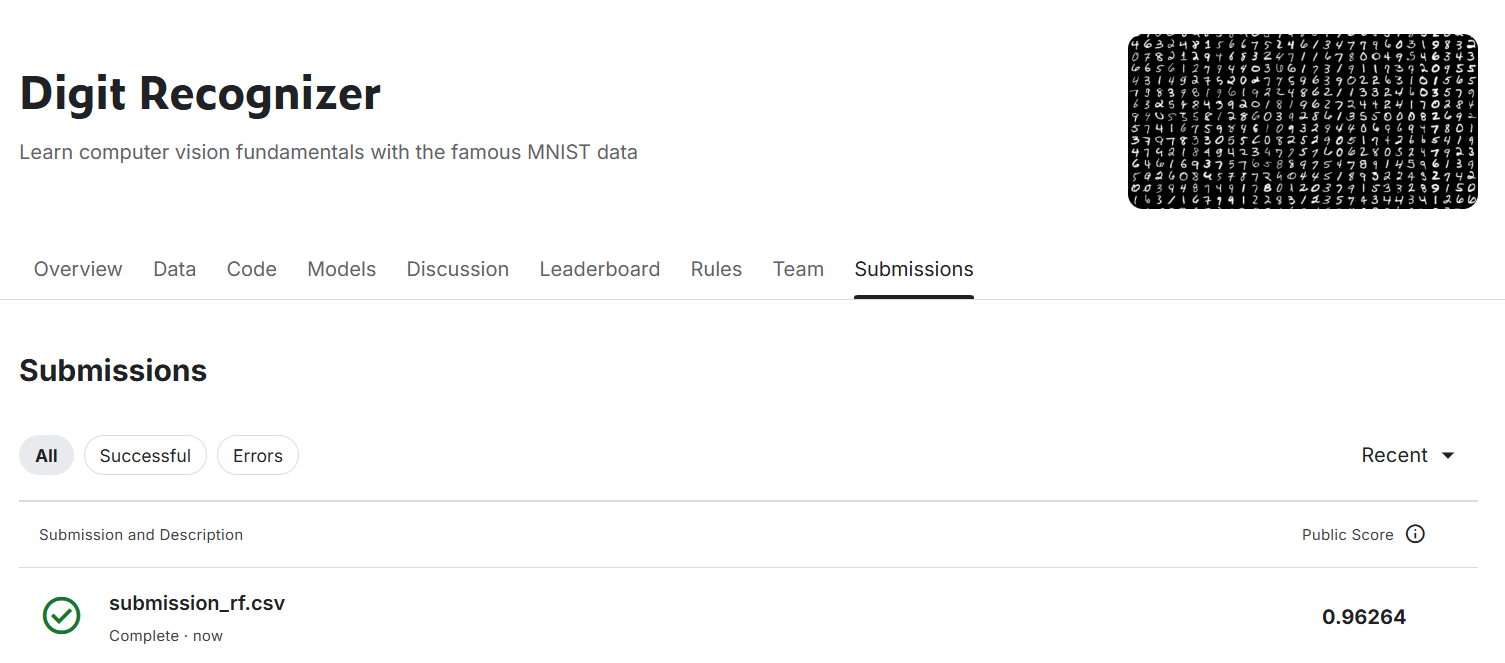

# Comparação dos resultados

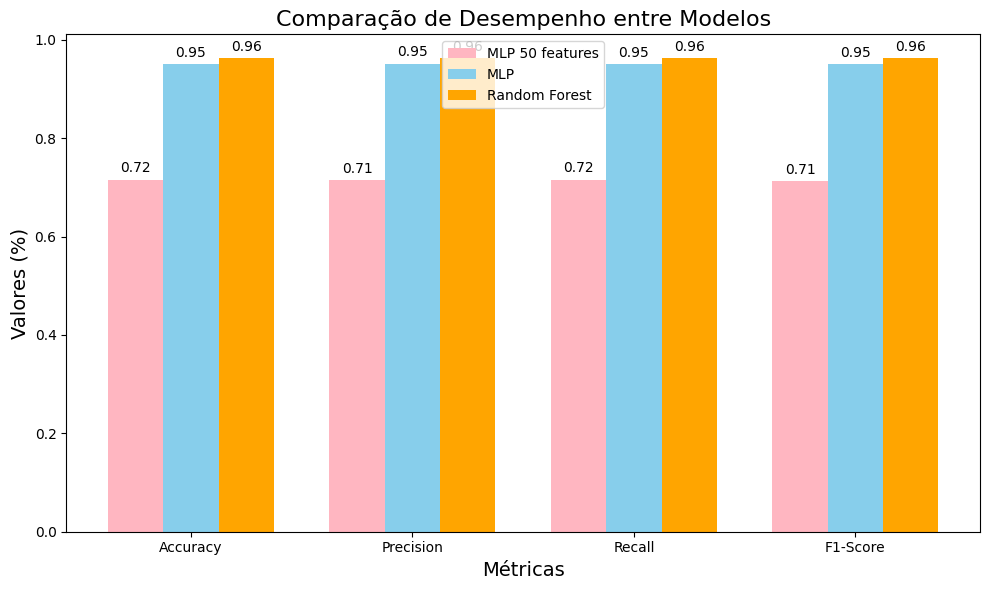

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados dos modelos
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
mlp_metrics = [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf]
features_metrics = [accuracy_features, precision_features, recall_features, f1_features]

# Configuração do gráfico
x = np.arange(len(metrics))  # Posições das métricas no eixo X
width = 0.25  # Largura das barras

fig, ax = plt.subplots(figsize=(10, 6))

# Barras para cada modelo
rects1 = ax.bar(x - width, features_metrics, width, label='MLP 50 features', color='lightpink')
rects2 = ax.bar(x, mlp_metrics, width, label='MLP', color='skyblue')
rects3 = ax.bar(x + width, rf_metrics, width, label='Random Forest', color='orange')

# Configurações do gráfico
ax.set_xlabel('Métricas', fontsize=14)
ax.set_ylabel('Valores (%)', fontsize=14)
ax.set_title('Comparação de Desempenho entre Modelos', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adiciona os valores acima das barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de deslocamento para cima
                    textcoords="offset points",
                    ha='center', va='bottom')

# Chamar a função autolabel para cada conjunto de barras
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()


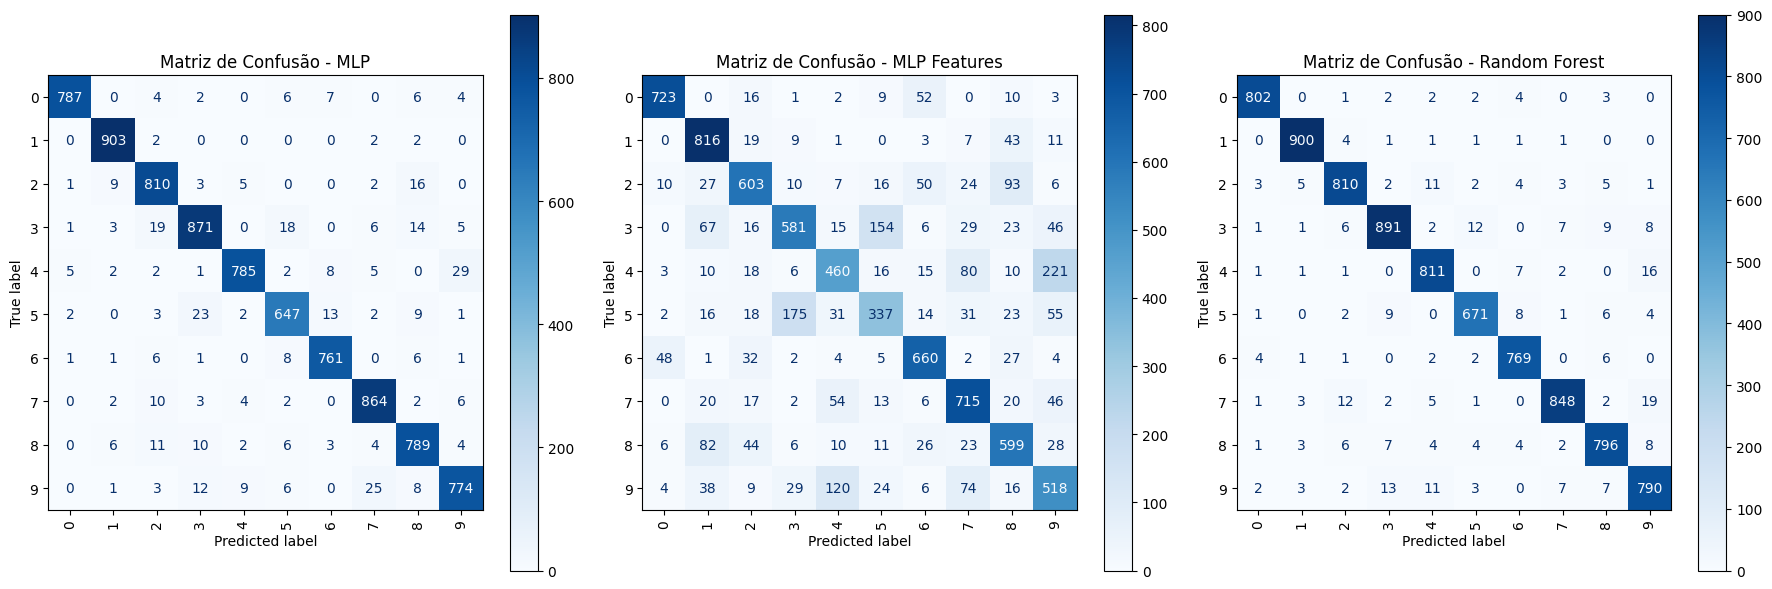

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar as matrizes de confusão
conf_matrix_mlp = confusion_matrix(y_val, y_pred)
conf_matrix_features = confusion_matrix(y_val, y_pred_features)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)

# Configurar os subplots para exibir as três matrizes lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Matriz de Confusão - MLP
disp_mlp = ConfusionMatrixDisplay(conf_matrix_mlp, display_labels=np.unique(y_train))
disp_mlp.plot(ax=axes[0], cmap='Blues', xticks_rotation='vertical')
axes[0].set_title("Matriz de Confusão - MLP")

# Matriz de Confusão - MLP Features
disp_features = ConfusionMatrixDisplay(conf_matrix_features, display_labels=np.unique(y_train))
disp_features.plot(ax=axes[1], cmap='Blues', xticks_rotation='vertical')
axes[1].set_title("Matriz de Confusão - MLP Features")

# Matriz de Confusão - Random Forest
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=np.unique(y_train))
disp_rf.plot(ax=axes[2], cmap='Blues', xticks_rotation='vertical')
axes[2].set_title("Matriz de Confusão - Random Forest")

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


       Feature  Importance
378  Pixel 378    0.009206
347  Pixel 347    0.008055
461  Pixel 461    0.008010
155  Pixel 155    0.007979
433  Pixel 433    0.007844
489  Pixel 489    0.007588
350  Pixel 350    0.007532
462  Pixel 462    0.007352
437  Pixel 437    0.007237
409  Pixel 409    0.007195
405  Pixel 405    0.007159
377  Pixel 377    0.006914
542  Pixel 542    0.006446
326  Pixel 326    0.006321
406  Pixel 406    0.006320
318  Pixel 318    0.006309
239  Pixel 239    0.006212
290  Pixel 290    0.006186
211  Pixel 211    0.006179
569  Pixel 569    0.006103


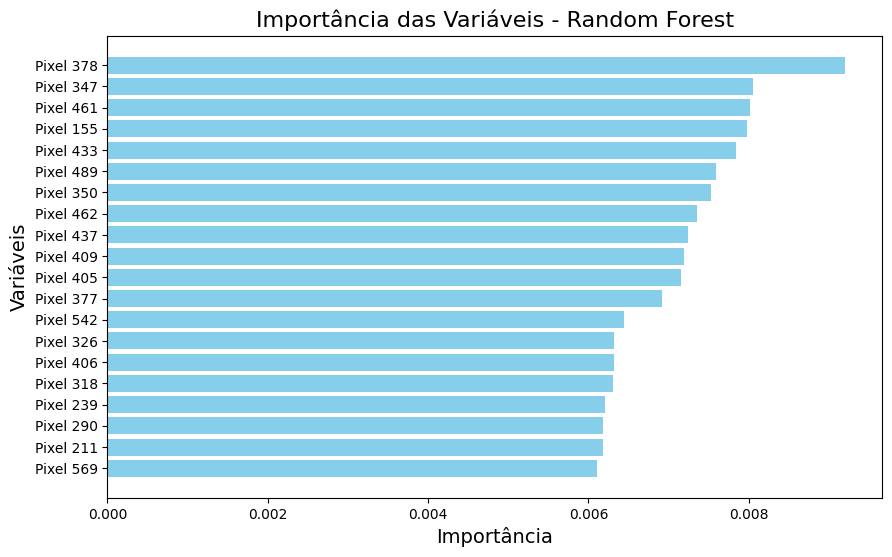

In [ ]:
import pandas as pd

# Importância das variáveis no modelo Random Forest
feature_importances = model_rf.feature_importances_
feature_names = [f'Pixel {i}' for i in range(len(feature_importances))]

# Criar DataFrame para ordenação
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as 20 principais variáveis
print(importance_df.head(20))

# Plotar gráfico das variáveis mais importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Variáveis', fontsize=14)
plt.title('Importância das Variáveis - Random Forest', fontsize=16)
plt.gca().invert_yaxis()
plt.show()


# Trabalhos futuros



*   Testar a seleção de características com essas que foram relevantes para o Random Forest
*   Testar outras configurações do MLP

